<a href="https://colab.research.google.com/github/Nahidjc/Machine_Learning/blob/main/labFinalNahid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/Lab_finalNahid.csv')

In [ ]:
dataset.head(5)

,ReflectionIndex,Sodium,Magnetium,Alumanium,Silicon,Barium,Type
0,1.52101,13.64,4.49,1.10,71.78,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,1


In [ ]:
dataset.isnull().sum()

ReflectionIndex     3
Sodium              6
Magnetium           3
Alumanium           6
Silicon            10
Barium              7
Type                0
dtype: int64

## **Handle Missing Values**

In [ ]:
dataset["Sodium"].fillna(dataset.groupby("Type")["Sodium"].transform("mean"),inplace=True)

In [ ]:
Magnetium_missing=dataset.Magnetium.mean()
dataset.Magnetium=dataset.Magnetium.fillna(Magnetium_missing)

In [ ]:
Silicon_missing=dataset.Silicon.mean()
dataset.Silicon=dataset.Silicon.fillna(Silicon_missing)


In [ ]:
Barium_missing=dataset.Barium.mean()
dataset.Barium=dataset.Barium.fillna(Barium_missing)

In [ ]:
Alumanium_missing=dataset.Alumanium.mean()
dataset.Alumanium=dataset.Alumanium.fillna(Alumanium_missing)

In [ ]:
dataset.isnull().sum()

ReflectionIndex    3
Sodium             0
Magnetium          0
Alumanium          0
Silicon            0
Barium             0
Type               0
dtype: int64

In [ ]:
Sodium_missing=dataset.Sodium.mean()
dataset.Sodium=dataset.Sodium.fillna(Sodium_missing)

In [ ]:
ReflectionIndex_missing=dataset.ReflectionIndex.mean()
dataset.ReflectionIndex=dataset.ReflectionIndex.fillna(ReflectionIndex_missing)

In [ ]:
dataset.isnull().sum()

ReflectionIndex    0
Sodium             0
Magnetium          0
Alumanium          0
Silicon            0
Barium             0
Type               0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReflectionIndex  214 non-null    float64
 1   Sodium           214 non-null    float64
 2   Magnetium        214 non-null    float64
 3   Alumanium        214 non-null    float64
 4   Silicon          214 non-null    float64
 5   Barium           214 non-null    float64
 6   Type             214 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.8 KB


dataset['Type']=dataset['Type'].astype(float)

# **Data Visulazation Part**

# **Target Class bar diagram.**

**Type is target Class**

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def bar_chart(feature):
  TypeOne=dataset[dataset['Type']==1][feature].value_counts()
  TypeTwo=dataset[dataset['Type']==2][feature].value_counts()
  TypeThree=dataset[dataset['Type']==3][feature].value_counts()
  TypeFive=dataset[dataset['Type']==5][feature].value_counts()
  TypeSix=dataset[dataset['Type']==6][feature].value_counts()
  TypeSeven=dataset[dataset['Type']==7][feature].value_counts()
  df = pd.DataFrame([TypeOne,TypeTwo,TypeThree,TypeFive,TypeSix,TypeSeven])
  df.index =['TypeOne','TypeTwo','TypeThree','TypeFive','TypeSix','TypeSeven']
  df.plot(kind='bar', stacked=True,figsize=(10,5))

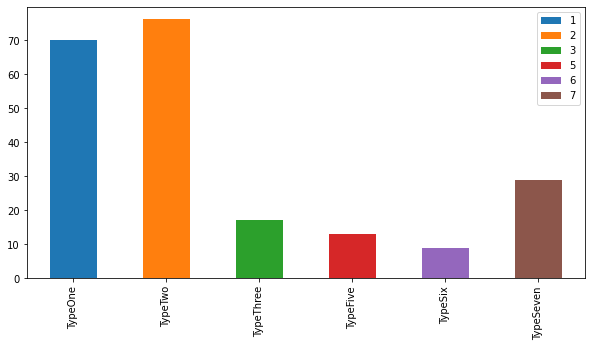

In [ ]:
bar_chart('Type')

# **Data Exploration and Visualization with Seaborn Pair Plots**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


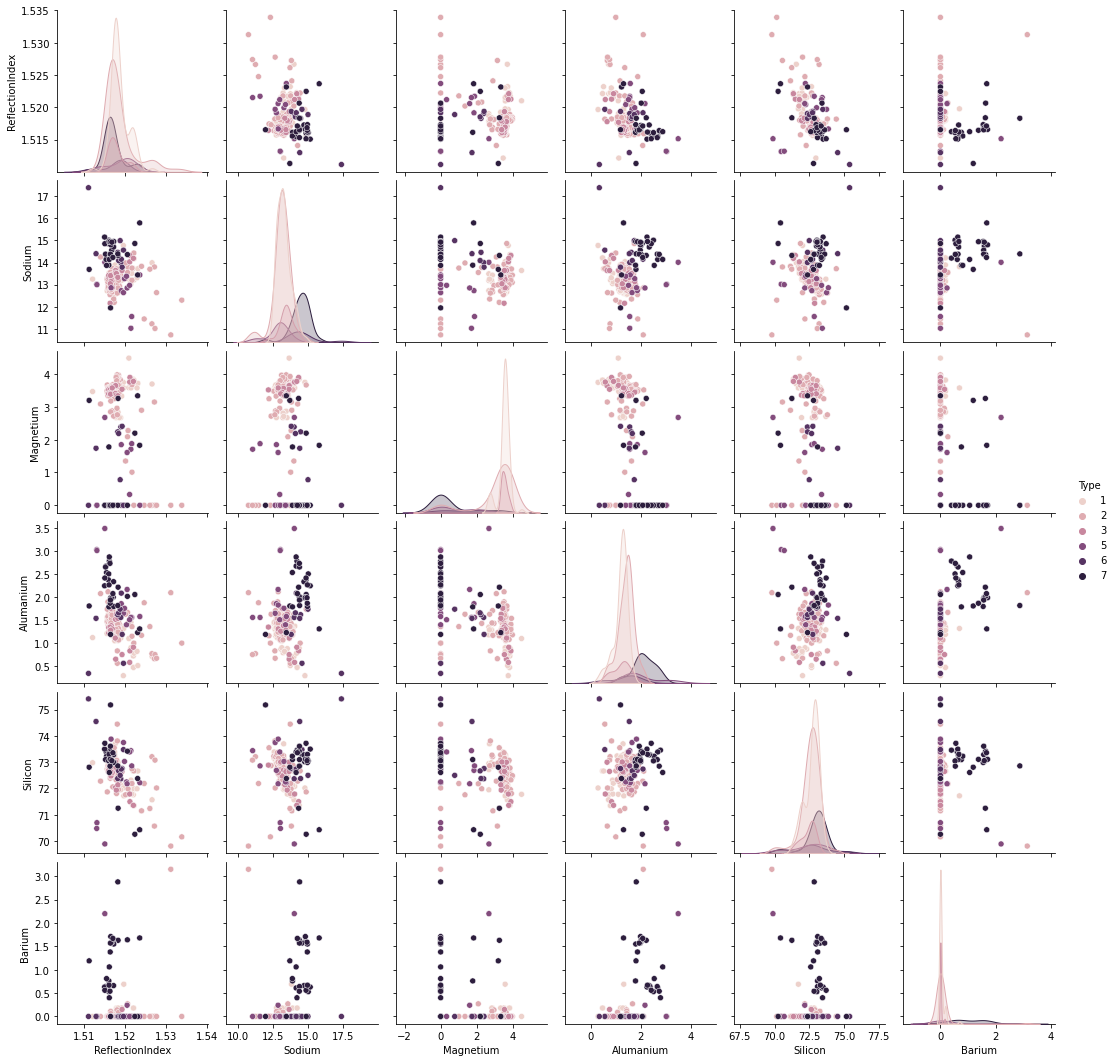

In [ ]:
sns.pairplot(dataset.iloc[:,:], hue='Type')

# **Data Exploration and Visualization with Seaborn Heat  Map**

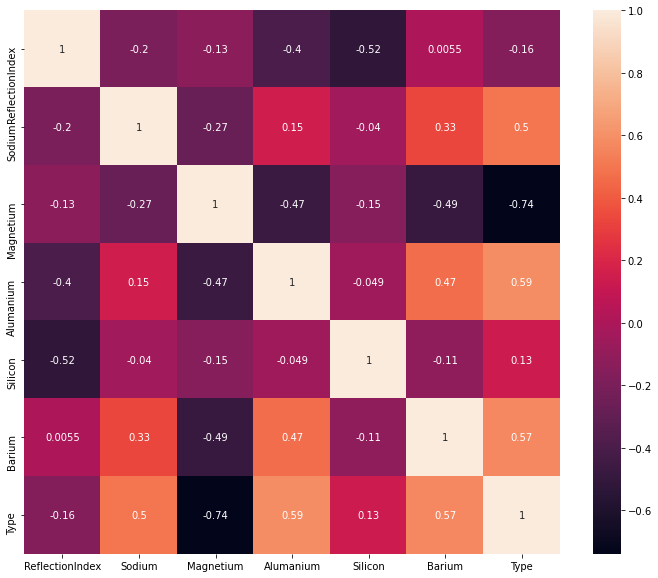

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.iloc[:,:].corr(),annot=True)

# **Find Accuracy**

In [ ]:
train_data=dataset.drop('Type', axis=1)
target=dataset['Type']
train_data.shape,target.shape

((214, 6), (214,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (train_data, target, test_size=.30)

print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)
print(y_test)
y_test.value_counts()

x_train (149, 6)
x_test (65, 6)
y_train (149,)
y_test (65,)
77     2
21     1
153    3
107    2
205    7
      ..
155    3
103    2
199    7
63     1
14     1
Name: Type, Length: 65, dtype: int64


2    27
1    22
7     6
3     4
6     3
5     3
Name: Type, dtype: int64

In [ ]:
dataset.dtypes

ReflectionIndex    float64
Sodium             float64
Magnetium          float64
Alumanium          float64
Silicon            float64
Barium             float64
Type                 int64
dtype: object

# **Decision Tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)

Train Dataset score **DT**

In [ ]:
dt_train_score = dt.score(x_train,y_train)

In [ ]:
print(dt_train_score*100)

100.0


In [ ]:
accuracy_test_data=model.score(x_test,y_test)

In [ ]:
accuracy_test_data

0.7076923076923077

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  4  2  0  0  0]
 [ 6 16  2  2  1  0]
 [ 0  1  3  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        22
           2       0.76      0.59      0.67        27
           3       0.43      0.75      0.55         4
           5       0.50      0.67      0.57         3
           6       0.75      1.00      0.86         3
           7       0.86      1.00      0.92         6

    accuracy                           0.71        65
   macro avg       0.67      0.79      0.72        65
weighted avg       0.73      0.71      0.71        65



**Test Dataset Accuracy DT**

In [ ]:
print(dt.score(x_test,y_test))

0.7076923076923077


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

70.76923076923077


# **Decision Tree Classifier Train data and Test Data Accuracy barchart**

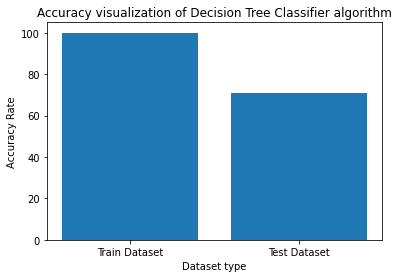

In [ ]:
DT_x=["Train Dataset","Test Dataset"]
DT_y=[dt_train_score*100,accuracy_score(y_test, y_pred)*100]
plt.bar(DT_x,DT_y)
plt.xlabel("Dataset type")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy visualization of Decision Tree Classifier algorithm")
plt.show()

# Apply RandomForest Tree 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Train Dataset score Random Forest**

In [ ]:
dt_train_score = rf.score(x_train,y_train)

In [ ]:
print(dt_train_score*100)

100.0


**Test Dataset score Random Forest**

In [ ]:
dt_test_score = rf.score(x_test,y_test)

In [ ]:
print(dt_test_score*100)

76.92307692307693


In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

76.92307692307693


# **Random Forest Algorithm Train data and Test Data Accuracy barchart**

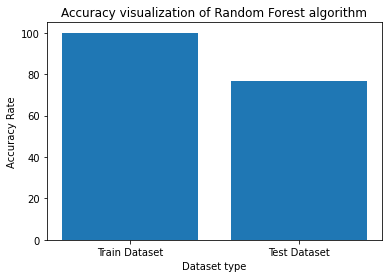

In [ ]:
RF_x=["Train Dataset","Test Dataset"]
RF_y=[dt_train_score*100,dt_test_score*100]
plt.bar(RF_x,RF_y)
plt.xlabel("Dataset type")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy visualization of Random Forest algorithm")
plt.show()

# **Support Vector Machine Analysis SVM Algorithm**

In [ ]:
from sklearn.svm import SVC

In [ ]:
SM=SVC()

In [ ]:
SM.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
dt_test_score=SM.score(x_test,y_test)

In [ ]:
print(dt_test_score)

0.4153846153846154


In [ ]:
dt_train_score=SM.score(x_train,y_train)

In [ ]:
print(dt_train_score)

0.3288590604026846


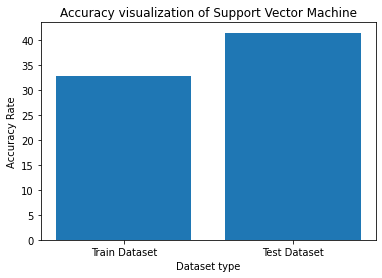

In [ ]:
RF_x=["Train Dataset","Test Dataset"]
RF_y=[dt_train_score*100,dt_test_score*100]
plt.bar(RF_x,RF_y)
plt.xlabel("Dataset type")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy visualization of Support Vector Machine")
plt.show()